In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset
data = pd.read_csv('house-votes-84.csv')

In [15]:
data.describe

<bound method NDFrame.describe of           party infant water budget physician salvador religious satellite  \
0    republican      0     1      0         1        1         1         0   
1    republican      0     1      0         1        1         1         0   
2      democrat   <NA>     1      1      <NA>        1         1         0   
3      democrat      0     1      1         0     <NA>         1         0   
4      democrat      1     1      1         0        1         1         0   
..          ...    ...   ...    ...       ...      ...       ...       ...   
430  republican      0     0      1         1        1         1         0   
431    democrat      0     0      1         0        0         0         1   
432  republican      0  <NA>      0         1        1         1         0   
433  republican      0     0      0         1        1         1      <NA>   
434  republican      0     1      0         1        1         1         0   

      aid missile immigration

In [4]:
#Initial inspection
# Displaying basic information about the dataset
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   party             435 non-null    object
 1   infant            435 non-null    object
 2   water             435 non-null    object
 3   budget            435 non-null    object
 4   physician         435 non-null    object
 5   salvador          435 non-null    object
 6   religious         435 non-null    object
 7   satellite         435 non-null    object
 8   aid               435 non-null    object
 9   missile           435 non-null    object
 10  immigration       435 non-null    object
 11  synfuels          435 non-null    object
 12  education         435 non-null    object
 13  superfund         435 non-null    object
 14  crime             435 non-null    object
 15  dutyfree exports  435 non-null    object
dtypes: object(16)
memory usage: 54.5+ KB
        party infant wate

In [5]:
#Handlling missing values
# Replacement '?' with NaN for easier handling of missing values
data.replace('?', pd.NA, inplace=True)

In [6]:
#Removal of duplicates
# Identifying and drop duplicate rows
data_cleaned = data.drop_duplicates()
print(f"Number of duplicates removed: {data.duplicated().sum()}")

Number of duplicates removed: 117


In [7]:
#Impute missing values
# Fill missing values with the mode of each column
data_imputed = data_cleaned.apply(lambda col: col.fillna(col.mode()[0] if col.mode().size > 0 else '0'))

In [8]:
# Confirming no missing values remain
print(f"Missing values after imputation: {data_imputed.isnull().sum().sum()}")

Missing values after imputation: 0


In [9]:
#Encoding categorical variables
label_encoder = LabelEncoder()
data_imputed['party'] = label_encoder.fit_transform(data_imputed['party'])
data_imputed.iloc[:, 1:] = data_imputed.iloc[:, 1:].astype(int)

In [10]:
#Scale the features
scaler = StandardScaler()
X = data_imputed.iloc[:, 1:]
y = data_imputed['party']
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

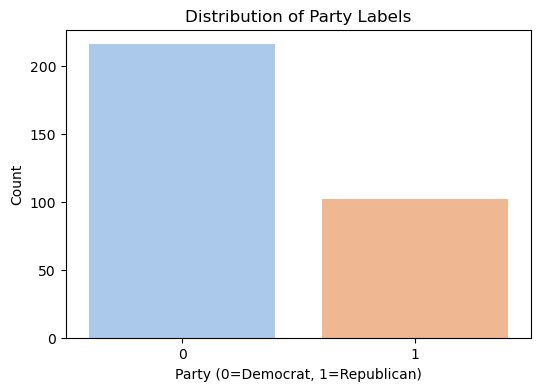

In [11]:
#Exploratory Data Analysis (EDA)
# Plot the distribution of the target variable ('party')
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='pastel')
plt.title('Distribution of Party Labels')
plt.xlabel('Party (0=Democrat, 1=Republican)')
plt.ylabel('Count')
plt.show()

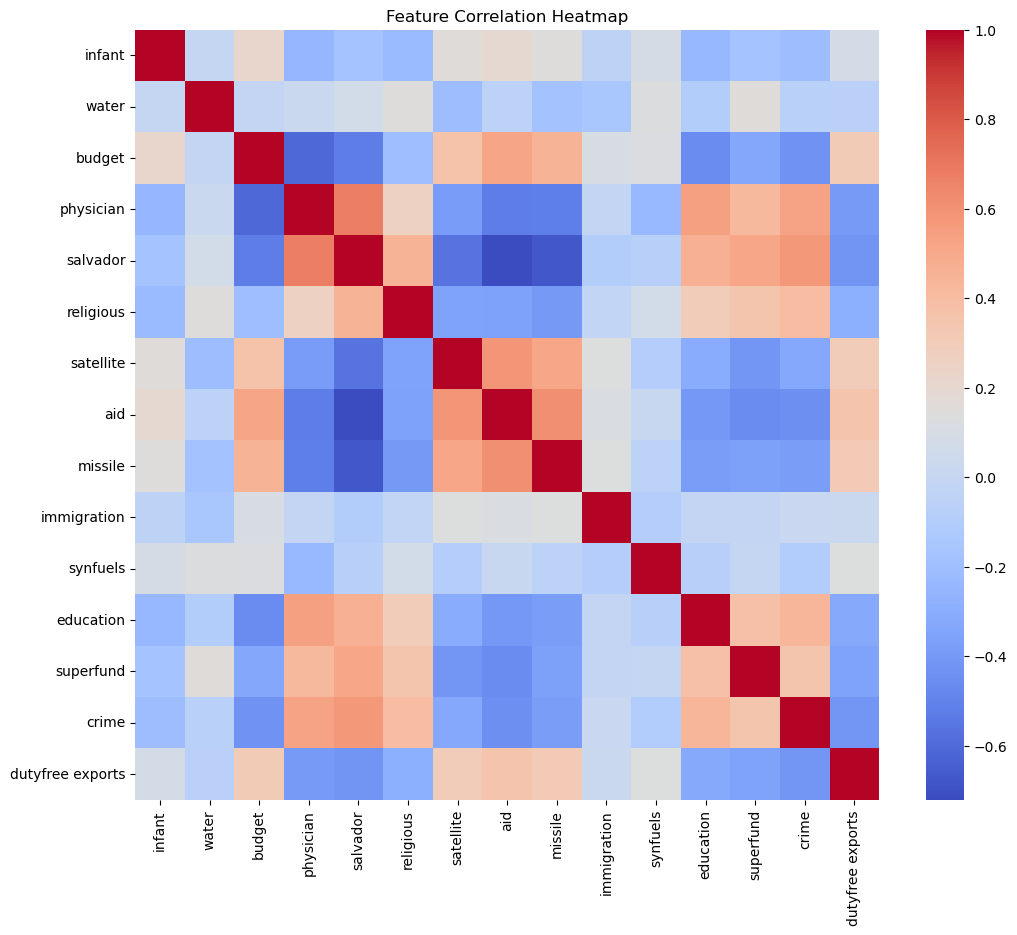

In [12]:
# Plot the correlation heatmap of features
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
#Train-Test Split
# Splitting dataset into training (70%), validation (20%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

In [14]:
# Print dataset split sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 222 samples
Validation set size: 64 samples
Testing set size: 32 samples


In [3]:
from skopt.space import Integer, Real, Categorical

# the search space for hyperparameters
search_space = [
    Integer(10, 500, name="n_estimators"),  # Number of trees in ensemble models
    Integer(1, 20, name="max_depth"),       # Maximum depth of each tree
    Real(0.01, 1.0, name="learning_rate", prior="log-uniform"),  # Learning rate for boosting algorithms
    Real(0.1, 1.0, name="subsample"),       # Subsampling fraction
    Categorical(["gini", "entropy"], name="criterion"),  # Splitting criterion for tree-based models
    Real(1e-5, 1e-2, name="min_impurity_decrease", prior="log-uniform")  # Minimum impurity for splits
]

# Example of search space ranges:
print("Search Space Defined:")
for param in search_space:
    print(param)


Search Space Defined:
Integer(low=10, high=500, prior='uniform', transform='identity')
Integer(low=1, high=20, prior='uniform', transform='identity')
Real(low=0.01, high=1.0, prior='log-uniform', transform='identity')
Real(low=0.1, high=1.0, prior='uniform', transform='identity')
Categorical(categories=('gini', 'entropy'), prior=None)
Real(low=1e-05, high=0.01, prior='log-uniform', transform='identity')
